In [44]:
import pandas as pd
import klib as kl

In [45]:
data = pd.read_csv('data/WIOA_GA_2022.csv')
data.head()

/var/folders/d4/rcb0hfcs0bzgr7z0mw72lc_w0000gn/T/ipykernel_80937/3140198450.py:1: DtypeWarning: Columns (95,185) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/WIOA_GA_2022.csv')


,PIRL100,PIRL108A,PIRL108B,PIRL201,PIRL202,PIRL203,PIRL204,PIRL205,PIRL206,PIRL207,...,CALC4034,CALC4035,CALC4036,CALC4037,CALC4038,CALC4039,CALC4040,CALC4041,REPORT_QUARTER,LOCAL_BOARD_NAME
0,0eed4DL9UdF5,13050.0,NaN,1,1,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18.0,9999.0,0.0,20230630,Georgia Mountains (Area 2)
1,0eedffcee0DU,13050.0,NaN,2,0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,30.0,2021.0,0.0,20230630,Georgia Mountains (Area 2)
2,0eeeA4eFUa09,13250.0,13903.0,2,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,38.0,9999.0,0.0,20230630,Fulton County (Area 6)
3,0eeeUeUcaFDa,13250.0,13903.0,2,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,44.0,9999.0,0.0,20230630,Fulton County (Area 6)
4,0eefSS0ecabU,13250.0,13903.0,2,9,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,43.0,2021.0,0.0,20230630,Fulton County (Area 6)


In [50]:
field_lookups = pd.read_csv('reference_data/reference_table_lookups.csv').iloc[:,:6]
field_lookups_dict = field_lookups[['DATA ELEMENT NO.', 'DATA ELEMENT NAME']].drop_duplicates()
field_lookups_dict = dict(zip(field_lookups_dict['DATA ELEMENT NO.'], field_lookups_dict['DATA ELEMENT NAME']))

In [52]:
field_lookups.head(5)

,DATA ELEMENT NO.,DATA ELEMENT NAME,DATA TYPE/ \nFIELD LENGTH,DATA ELEMENT DEFINITIONS/INSTRUCTIONS,CODE VALUE,Notes
0,SECTION A - INDIVIDUAL INFORMATION,NaN,NaN,NaN,NaN,NaN
1,SECTION A.01 - IDENTIFYING DATA,NaN,NaN,NaN,NaN,NaN
2,100,Unique Individual Identifier \n(WIOA),AN 12,Record the unique identification number assign...,XXXXXXXXXXXX,Encrypted
3,101,State Code of Residence \n(WIOA),AN 2,Record the 2-letter FIPS alpha code of the sta...,XX,This Item is blank in public use file to \npre...
4,102,County Code of Residence,IN 3,Record the 3-digit FIPS Code of the County of ...,000,This Item is blank in public use file to \npre...


In [15]:

df_cols = [col.replace('PIRL','') for col in  data.columns]
columns = [field_lookups.get(col, col) for col in df_cols]
data.columns = columns

data = kl.clean_column_names(data)

data.head(5)

,unique_individual_identifier_wioa,108a,108b,sex_wioa,individual_with_a_disability_wioa,category_of_disability,individual_with_a_disability_sdda_services,individual_with_a_disability_lsmha_services,individual_with_a_disability_medicaid_hcbs_services,individual_with_a_disability_work_setting,...,a_program_of_study_leading_to_a_baccalaureate_degree,a_program_of_study_leading_to_a_community_college_certificate_of_completion,a_program_of_study_leading_to_a_secondary_school_diploma_or_its_equivalent,a_program_of_study_leading_to_employment,a_program_of_study_leading_to_a_measurable_skills_gain,age_at_participation,program_year_of_exit,served_by_veteran_s_programs,report_quarter,local_board_name
0,0eed4DL9UdF5,13050.0,NaN,1,1,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18.0,9999.0,0.0,20230630,Georgia Mountains (Area 2)
1,0eedffcee0DU,13050.0,NaN,2,0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,30.0,2021.0,0.0,20230630,Georgia Mountains (Area 2)
2,0eeeA4eFUa09,13250.0,13903.0,2,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,38.0,9999.0,0.0,20230630,Fulton County (Area 6)
3,0eeeUeUcaFDa,13250.0,13903.0,2,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,44.0,9999.0,0.0,20230630,Fulton County (Area 6)
4,0eefSS0ecabU,13250.0,13903.0,2,9,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,43.0,2021.0,0.0,20230630,Fulton County (Area 6)


In [18]:
data.shape

(370930, 186)

### Null Value Checks

probably need to be handled. Likely with zero fill. 

In [37]:
# change setting
pd.set_option('display.max_rows', None)  # Show all rows


In [43]:
display(data.isna().sum().reset_index().sort_values(ascending=False, by=0))

,index,0
132,date_attained_recognized_credential_hash_3_wioa,370909
92,received_pre_vocational_activities,370905
141,date_attained_graduate_post_graduate_degree_wioa,370897
130,date_attained_recognized_credential_hash_2_wioa,369868
133,date_of_most_recent_measurable_skill_gains_edu...,369833
160,wioa_youth_employment_rate_quarter_4,368948
158,wioa_youth_median_earnings_quarter_2,368846
136,date_of_most_recent_measurable_skill_gains_tra...,368653
135,date_of_most_recent_measurable_skill_gains_sec...,368237
37,date_of_actual_dislocation,368231


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

def plot_gender_distribution(df):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='sex_wioa', data=df, palette='pastel')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

def plot_age_distribution(df):
    plt.figure(figsize=(6, 4))
    sns.histplot(df['age_at_participation'], bins=20, kde=True, color='skyblue')
    plt.title('Age Distribution of Participants')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

def plot_employment_status(df):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='employment_status_at_program_entry_wioa', data=df, palette='muted')
    plt.title('Employment Status at Program Entry')
    plt.xlabel('Employment Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


def plot_veteran_status(df):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='veteran_status', data=df, palette='Set2')
    plt.title('Veteran Status Breakdown')
    plt.xlabel('Veteran Status')
    plt.ylabel('Count')
    plt.show()

def plot_education_level(df):
    plt.figure(figsize=(8, 4))
    sns.countplot(y='highest_educational_level_completed_at_program_entry_wioa', data=df, palette='viridis')
    plt.title('Education Level at Program Entry')
    plt.xlabel('Count')
    plt.ylabel('Education Level')
    plt.show()

def plot_program_participation(df):
    plt.figure(figsize=(6, 4))
    sns.histplot(df['program_year_of_exit'], bins=10, kde=True, color='coral')
    plt.title('Program Participation Over Time')
    plt.xlabel('Program Year of Exit')
    plt.ylabel('Count')
    plt.show()

def plot_employment_rate(df):
    rate_columns = ['wioa_employment_rate_quarter_2', 'wioa_employment_rate_quarter_4']
    df_melted = df[rate_columns].melt(var_name='Quarter', value_name='Employment Rate')
    
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Quarter', y='Employment Rate', data=df_melted, palette='Blues')
    plt.title('Employment Rate After Program')
    plt.xlabel('Quarter')
    plt.ylabel('Employment Rate')
    plt.show()

def plot_exit_reasons(df):
    plt.figure(figsize=(8, 4))
    sns.countplot(y='other_reasons_for_exit_wioa', data=df, palette='coolwarm')
    plt.title('Reasons for Program Exit')
    plt.xlabel('Count')
    plt.ylabel('Exit Reason')
    plt.show()

def plot_assistance_impact(df):
    assistance_columns = ['supplemental_nutrition_assistance_program_snap', 'other_public_assistance_recipient']
    df_assist = df[assistance_columns].sum()
    
    plt.figure(figsize=(6, 4))
    df_assist.plot(kind='bar', color=['blue', 'orange'])
    plt.title('Impact of Public Assistance on Program Participation')
    plt.xlabel('Public Assistance Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


/var/folders/d4/rcb0hfcs0bzgr7z0mw72lc_w0000gn/T/ipykernel_80937/3997936330.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex_wioa', data=df, palette='pastel')


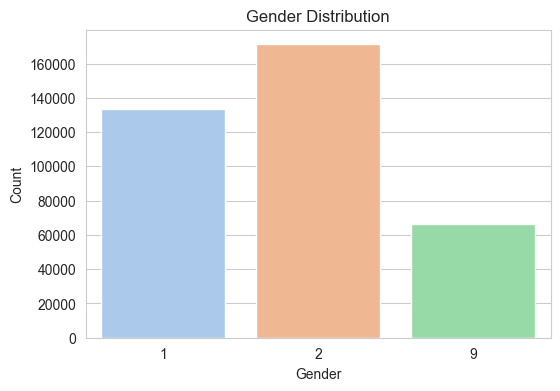

In [24]:
plot_gender_distribution(data)

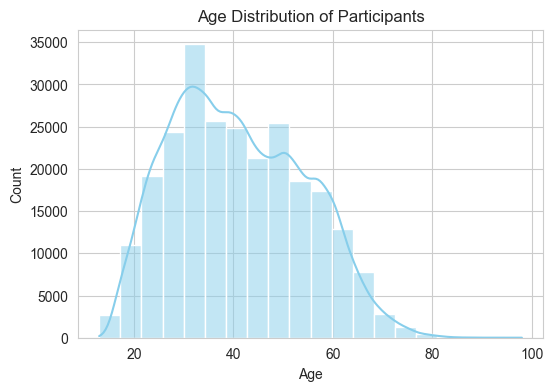

In [25]:
plot_age_distribution(data)

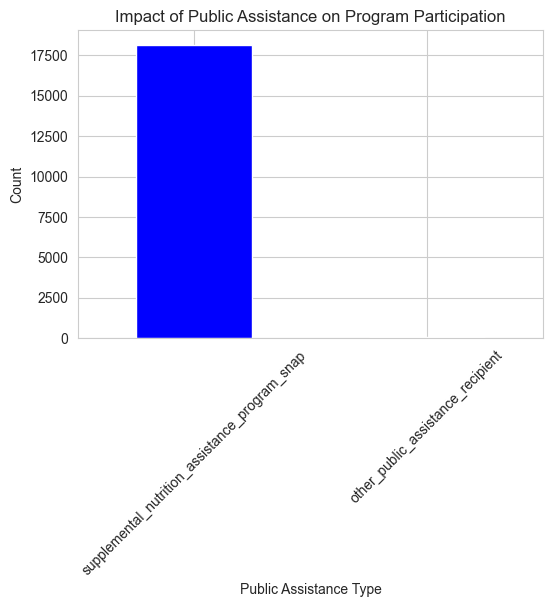

In [26]:
plot_assistance_impact(data)

/var/folders/d4/rcb0hfcs0bzgr7z0mw72lc_w0000gn/T/ipykernel_80937/3997936330.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='highest_educational_level_completed_at_program_entry_wioa', data=df, palette='viridis')


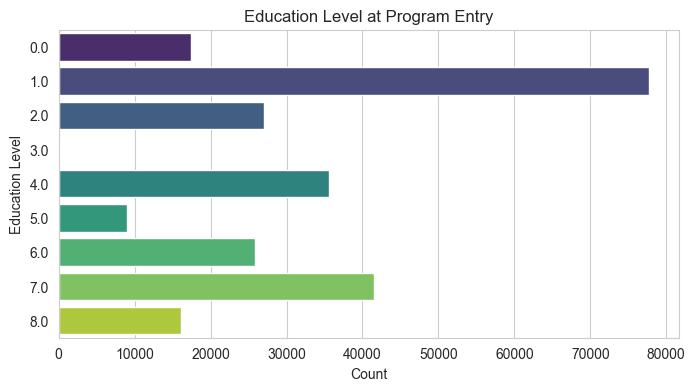

In [28]:
plot_education_level(data)

/var/folders/d4/rcb0hfcs0bzgr7z0mw72lc_w0000gn/T/ipykernel_80937/3997936330.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='employment_status_at_program_entry_wioa', data=df, palette='muted')


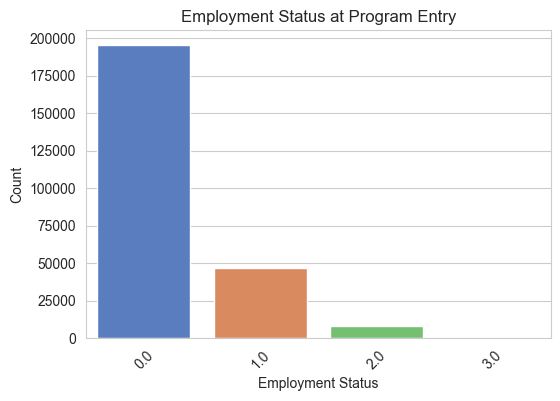

In [29]:
plot_employment_status(data)

/var/folders/d4/rcb0hfcs0bzgr7z0mw72lc_w0000gn/T/ipykernel_80937/3997936330.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quarter', y='Employment Rate', data=df_melted, palette='Blues')


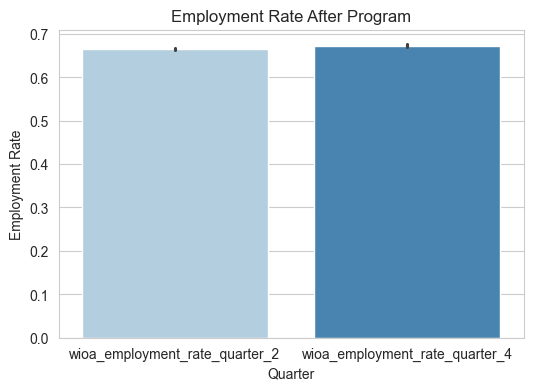

In [31]:
plot_employment_rate(data)

/var/folders/d4/rcb0hfcs0bzgr7z0mw72lc_w0000gn/T/ipykernel_80937/3997936330.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='other_reasons_for_exit_wioa', data=df, palette='coolwarm')


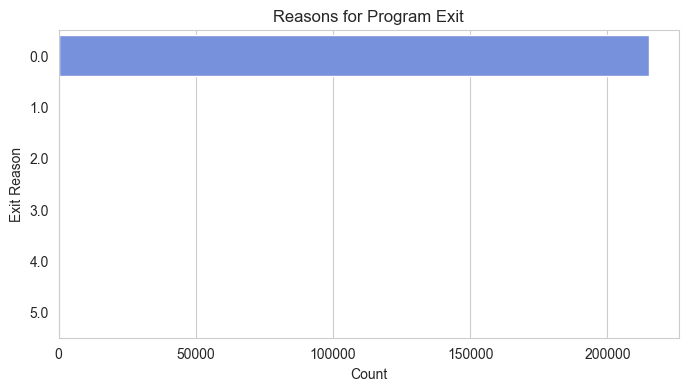

In [33]:
plot_exit_reasons(data)

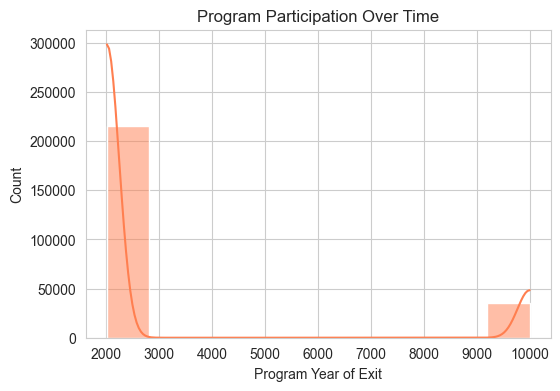

In [34]:
plot_program_participation(data)

/var/folders/d4/rcb0hfcs0bzgr7z0mw72lc_w0000gn/T/ipykernel_80937/3997936330.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='veteran_status', data=df, palette='Set2')


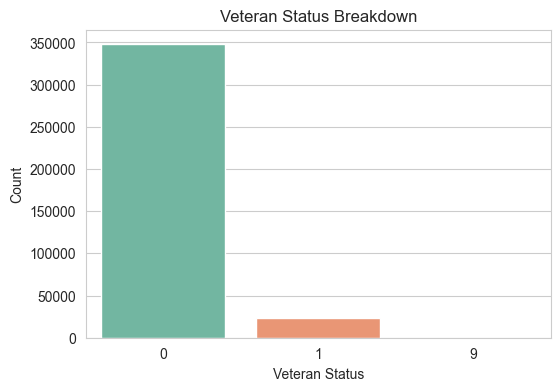

In [35]:
plot_veteran_status(data)

In [36]:
plot_wage_trends(data)

KeyError: "None of [Index(['wages_2nd_quarter_after_exit', 'wages_4th_quarter_after_exit'], dtype='object')] are in the [columns]"